In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from rouge import Rouge
import re


# 설치된 폰트를 Matplotlib에 적용
import matplotlib.font_manager as fm

In [2]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 리눅스의 경우

#!apt install fonts-nanum

# 폰트 경로 설정
font_dir = "/usr/share/fonts/truetype/nanum"
font_files = fm.findSystemFonts(fontpaths=font_dir)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [19]:
# 결과 데이터1 불러오기
file_path1 = '/home/code/prediction/jx7789-kobart_summary_v3-2x75p-l6-n4-b5-ck56061_output.csv'
try:
    score1_data = pd.read_csv(file_path1, encoding='utf-8')
except UnicodeDecodeError:
    score1_data = pd.read_csv(file_path1, encoding='euc-kr')

In [20]:
# 결과 데이터2 불러오기
file_path2 = '/home/code/prediction/jx7789-kobart_summary_v3-2x75p-l6-n4-b5-ck62290_output.csv'
try:
    score2_data = pd.read_csv(file_path2, encoding='utf-8')
except UnicodeDecodeError:
    score2_data = pd.read_csv(file_path2, encoding='euc-kr')

In [22]:
# 데이터 불러오기
file_path3 = '/home/data/test.csv'
try:
    test1_data = pd.read_csv(file_path3, encoding='utf-8')
    test2_data = pd.read_csv(file_path3, encoding='utf-8')
except UnicodeDecodeError:
    test1_data = pd.read_csv(file_path3, encoding='euc-kr')
    test2_data = pd.read_csv(file_path3, encoding='euc-kr')

In [32]:
test1_data['summary'] = score1_data['summary']
test2_data['summary'] = score2_data['summary']

In [35]:
def rouge_func(data):
    rouge = Rouge()

    rouge_values = []

    for i in range(len(data)):
        results = rouge.get_scores(data['dialogue'][i], data['summary'][i], avg=True)
        mean = (results['rouge-1']['f'] + results['rouge-2']['f'] + results['rouge-l']['f'])/3
        print(str(data['fname'][i]).ljust(12),
            "    rouge-1:", str(round(results['rouge-1']['f'],4)).ljust(7),
            "    rouge-2:", str(round(results['rouge-2']['f'],4)).ljust(7),
            "    rouge-L:", str(round(results['rouge-l']['f'],4)).ljust(7),
            "    mean:", str(round(mean, 4)).ljust(7)
            )
        value = (round(results['rouge-1']['f'],4),
                round(results['rouge-2']['f'],4),
                round(results['rouge-l']['f'],4),
                round(mean, 4)
                )
        rouge_values.append(value)
        
        #result = {key: value["f"]  for key, value in results.items()}

    #print(rouge_values)
    rouge_df = pd.DataFrame(rouge_values)
    display(rouge_df.describe())
    
    return rouge_df

rouge_df1 = rouge_func(test1_data)
rouge_df2 = rouge_func(test2_data)


test_0           rouge-1: 0.2353      rouge-2: 0.114       rouge-L: 0.2353      mean: 0.1949 
test_1           rouge-1: 0.1471      rouge-2: 0.0625      rouge-L: 0.1471      mean: 0.1189 
test_2           rouge-1: 0.1584      rouge-2: 0.0702      rouge-L: 0.1584      mean: 0.129  
test_3           rouge-1: 0.129       rouge-2: 0.0571      rouge-L: 0.129       mean: 0.1051 
test_4           rouge-1: 0.2192      rouge-2: 0.1319      rouge-L: 0.2192      mean: 0.1901 
test_5           rouge-1: 0.1608      rouge-2: 0.098       rouge-L: 0.1608      mean: 0.1399 
test_6           rouge-1: 0.172       rouge-2: 0.0734      rouge-L: 0.172       mean: 0.1392 
test_7           rouge-1: 0.1481      rouge-2: 0.06        rouge-L: 0.1481      mean: 0.1188 
test_8           rouge-1: 0.1429      rouge-2: 0.0833      rouge-L: 0.1429      mean: 0.123  
test_9           rouge-1: 0.25        rouge-2: 0.1348      rouge-L: 0.25        mean: 0.2116 
test_10          rouge-1: 0.3333      rouge-2: 0.2         r

,0,1,2,3
count,499.000000,499.000000,499.000000,499.000000
mean,0.180289,0.089058,0.178804,0.149384
std,0.077858,0.063882,0.077786,0.071920
min,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.045500,0.125000,0.097850
50%,0.169800,0.076900,0.169000,0.138900
75%,0.225200,0.125000,0.222200,0.192200
max,0.440700,0.318800,0.440700,0.400100


test_0           rouge-1: 0.2452      rouge-2: 0.114       rouge-L: 0.2452      mean: 0.2014 
test_1           rouge-1: 0.1471      rouge-2: 0.0625      rouge-L: 0.1471      mean: 0.1189 
test_2           rouge-1: 0.1569      rouge-2: 0.0702      rouge-L: 0.1569      mean: 0.128  
test_3           rouge-1: 0.1136      rouge-2: 0.0606      rouge-L: 0.1136      mean: 0.096  
test_4           rouge-1: 0.1944      rouge-2: 0.0889      rouge-L: 0.1944      mean: 0.1593 
test_5           rouge-1: 0.1608      rouge-2: 0.098       rouge-L: 0.1608      mean: 0.1399 
test_6           rouge-1: 0.172       rouge-2: 0.0734      rouge-L: 0.172       mean: 0.1392 
test_7           rouge-1: 0.1481      rouge-2: 0.06        rouge-L: 0.1481      mean: 0.1188 
test_8           rouge-1: 0.1429      rouge-2: 0.0833      rouge-L: 0.1429      mean: 0.123  
test_9           rouge-1: 0.2619      rouge-2: 0.1489      rouge-L: 0.2619      mean: 0.2242 
test_10          rouge-1: 0.3         rouge-2: 0.1739      r

,0,1,2,3
count,499.000000,499.000000,499.000000,499.000000
mean,0.182922,0.090664,0.181186,0.151591
std,0.077082,0.063202,0.076900,0.071166
min,0.000000,0.000000,0.000000,0.000000
25%,0.129700,0.045650,0.128200,0.102950
50%,0.173900,0.079700,0.173900,0.141600
75%,0.226550,0.125000,0.223900,0.192150
max,0.408200,0.307700,0.408200,0.359700


In [36]:
# 대화와 요약의 길이 계산

def feature(data, rouge_df):
    data['dia_len'] = data['dialogue'].apply(len)
    data['sum_len'] = data['summary'].apply(len)

    data['Rouge-1'] = rouge_df[0]
    data['Rouge-2'] = rouge_df[1]
    data['Rouge-L'] = rouge_df[2]
    data['mean'] = rouge_df[3]
    display(data)
    return data

test1_data = feature(test1_data, rouge_df1)
test2_data = feature(test2_data, rouge_df2)

,fname,dialogue,summary,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
0,test_0,"#Person1#: 더슨 씨, 받아쓰기 좀 해주세요. \n#Person2#: 네, ...",더슨 씨는 #Person1#에게 이메일 통신과 공식 메모로 제한되는 내부 메모에 대...,821,155,0.2353,0.1140,0.2353,0.1949
1,test_1,#Person1#: 드디어 왔네! 왜 그렇게 오래 걸렸어?\n#Person2#: 또...,#Person1#은 #Person2#에게 교통 체증에 걸렸다고 말한다. #Perso...,625,140,0.1471,0.0625,0.1471,0.1189
2,test_2,"#Person1#: 케이트, 무슨 일이 일어났는지 너는 믿지 못할거야. \n#Per...",#Person1#은 케이트에게 마샤와 히어로가 이혼을 신청했다고 말한다. 케이트는 ...,481,94,0.1584,0.0702,0.1584,0.1290
3,test_3,"#Person1#: 생일 축하해, 이건 너를 위한 거야, 브라이언.\n#Person...",브라이언은 #Person1#에게 자신의 생일을 축하한다. #Person1#은 브라이...,388,98,0.1290,0.0571,0.1290,0.1051
4,test_4,#Person1#: 이 올림픽 공원이 정말 크네요!\n#Person2#: 네. 지금...,#Person1#과 #Person2#는 올림픽 공원에 대해 이야기하고 있습니다. #...,389,123,0.2192,0.1319,0.2192,0.1901
...,...,...,...,...,...,...,...,...,...
494,test_495,"#Person1#: 헤이, 찰리, 학교 끝나고 우리 집에 와서 나랑 비디오 게임 할...",잭이 찰리에게 비디오 게임을 제안한다. 찰리는 잭에게 캐릭터를 만드는 게임을 추천한...,295,71,0.1299,0.0250,0.1299,0.0949
495,test_496,#Person1#: 어떻게 컨트리 음악에 관심을 가지게 되었나요?\r\n#Perso...,"#Person2#는 #Person1#에게 컨트리 음악에 관심을 가지게 된 계기, 라...",452,99,0.2178,0.1250,0.2178,0.1869
496,test_497,"#Person1#: 실례합니다, 앨리스. 이곳을 사용해본 적이 없는데, 기계를 어떻...","#Person1#은 앨리스에게 세탁기, 건조기, 비누를 어떻게 사용하는지 물어봅니다...",887,185,0.1879,0.0612,0.1879,0.1457
497,test_498,#Person1#: 매튜? 안녕!\r\n#Person2#: 스티브! 오랜만이네! 얼...,스티브는 계약이 다음 달에 끝나기 때문에 계약을 갱신하고 싶지 않다. 매튜는 그녀의...,537,101,0.1695,0.0597,0.1525,0.1272


,fname,dialogue,summary,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
0,test_0,"#Person1#: 더슨 씨, 받아쓰기 좀 해주세요. \n#Person2#: 네, ...",더슨 씨는 #Person1#에게 이메일 통신과 공식 메모로 제한되는 내부 메모에 대...,821,148,0.2452,0.1140,0.2452,0.2014
1,test_1,#Person1#: 드디어 왔네! 왜 그렇게 오래 걸렸어?\n#Person2#: 또...,#Person1#은 #Person2#에게 교통 체증에 걸렸다고 말한다. #Perso...,625,140,0.1471,0.0625,0.1471,0.1189
2,test_2,"#Person1#: 케이트, 무슨 일이 일어났는지 너는 믿지 못할거야. \n#Per...",#Person1#은 케이트에게 마샤와 히어로가 이혼을 신청했다고 말한다. 케이트는 ...,481,94,0.1569,0.0702,0.1569,0.1280
3,test_3,"#Person1#: 생일 축하해, 이건 너를 위한 거야, 브라이언.\n#Person...","브라이언은 #Person1#에게 자신의 생일을 축하하고, #Person1#은 브라이...",388,75,0.1136,0.0606,0.1136,0.0960
4,test_4,#Person1#: 이 올림픽 공원이 정말 크네요!\n#Person2#: 네. 지금...,#Person2#는 #Person1#에게 올림픽 공원이 크다고 말합니다. #Pers...,389,125,0.1944,0.0889,0.1944,0.1593
...,...,...,...,...,...,...,...,...,...
494,test_495,"#Person1#: 헤이, 찰리, 학교 끝나고 우리 집에 와서 나랑 비디오 게임 할...",잭이 찰리에게 집에 와서 비디오 게임을 하자고 제안한다. 찰리는 잭에게 캐릭터를 만...,295,71,0.1519,0.0488,0.1519,0.1175
495,test_496,#Person1#: 어떻게 컨트리 음악에 관심을 가지게 되었나요?\r\n#Perso...,#Person2#는 #Person1#에게 컨트리 음악에 관심을 가지게 된 계기와 라...,452,100,0.1584,0.0893,0.1584,0.1354
496,test_497,"#Person1#: 실례합니다, 앨리스. 이곳을 사용해본 적이 없는데, 기계를 어떻...","#Person1#은 앨리스에게 세탁기, 건조기, 비누를 어떻게 사용하는지 묻습니다....",887,252,0.2875,0.1327,0.2875,0.2359
497,test_498,#Person1#: 매튜? 안녕!\r\n#Person2#: 스티브! 오랜만이네! 얼...,스티브는 계약이 다음 달에 끝나기 때문에 집을 찾고 있다. 매튜는 그녀의 이웃인 다...,537,99,0.1709,0.0448,0.1538,0.1232


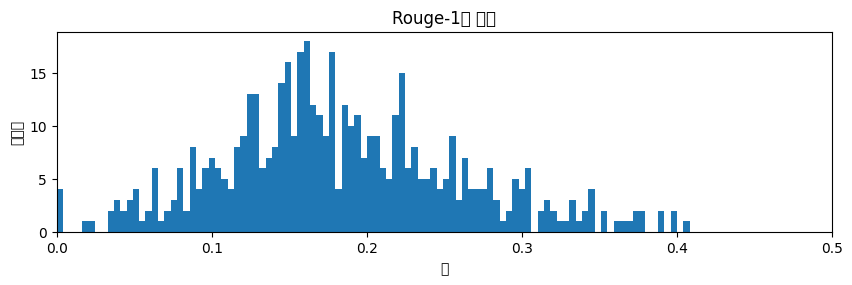

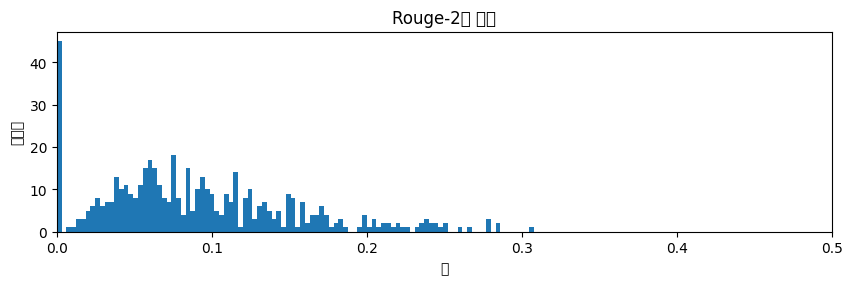

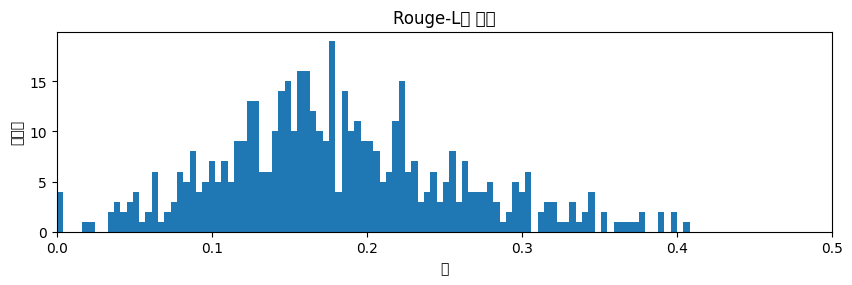

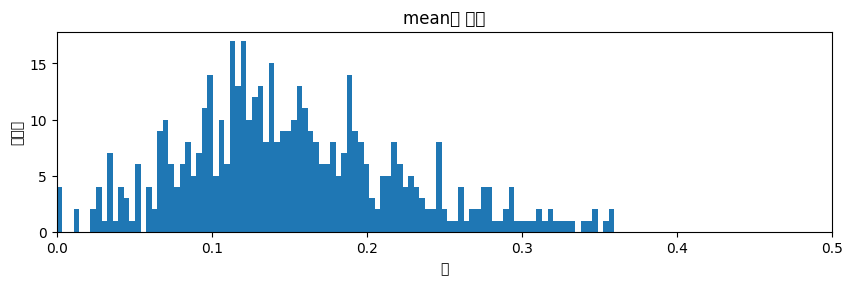

In [38]:
def graph(data):

    ticks = []
    j = 0

    for i in range(50) :
        ticks.append(j)
        j += 0.01

    ii = [data['Rouge-1'], data['Rouge-2'], data['Rouge-L'], data['mean']]
    iname = ['Rouge-1', 'Rouge-2', 'Rouge-L', 'mean']
    for i in range(4):
        # 히스토그램 그리기
        #fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2행 2열, 전체 플롯 크기 지정
        plt.figure(figsize=(10, 2.6))
        plt.hist(ii[i], bins=100)
        # 그래프 제목과 레이블 설정
        plt.title(iname[i] + '의 분포')
        plt.xlabel('값')
        plt.ylabel('빈도수')
        plt.xlim(0, 0.5)
        #plt.xticks(ticks)
        # 그래프 보여주기
        plt.show()

graph(test2_data)

In [ ]:
view1 = data[data['mean'] == 0]
print(len(view1))

In [ ]:
data.columns

In [28]:
view1 = data[data['Rouge-1'] == 0]
view2 = data[data['Rouge-2'] == 0]
viewL = data[data['Rouge-L'] == 0]
viewm = data[data['mean'] == 0]
display(view1)
display(view2)
display(viewL)
display(viewm)

,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...,#Person1#이 #Person2#에게 택시 요금을 알려줍니다.,요금 지불하기,179,36,0.0,0.0,0.0,0.0
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...,#Person1#은 #Person2#에게 그 남자의 말로 인해 혼란스러움을 느꼈다고...,혼란스러움,178,52,0.0,0.0,0.0,0.0
105,train_105,#Person1#: 어떤 춤을 좋아하나요?\n#Person2#: 저는 빠른 음악에 ...,#Person2#는 디스코를 좋아하므로 #Person1#과 #Person2#는 디스...,춤,299,77,0.0,0.0,0.0,0.0
129,train_129,"#Person1#: 신고하고 싶은 일이 있습니다, 선생님. 제가 테이블에서 웨이터가...",#Person1#이 불만을 제기합니다. #Person2#는 그녀의 식사비를 보상합니다.,보상,172,48,0.0,0.0,0.0,0.0
140,train_140,"#Person1#: 음, 그들 중 누가 타이핑을 더 잘하나요? \n#Person2#...","#Person1#는 #Person2#에게 메리와 존스를 타이핑, 속기, 언어 숙달도...",비교,352,64,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12322,train_12325,#Person1#: 티켓을 보여주시겠어요?\n#Person2#: 여기 있습니다.\n...,#Person1#은 스미스씨의 체크인을 도와줍니다.,체크인,258,28,0.0,0.0,0.0,0.0
12325,train_12328,"#Person1#: 자기야, 잠시만 나갔다 올게!\n#Person2#: 어디 가는 ...","#Person1#은 네일샵에 가겠다고 하고, 네일뿐만 아니라 매니큐어까지 서비스 해...",네일 샵,395,89,0.0,0.0,0.0,0.0
12359,train_12362,#Person1#: 이 버스 정말로 쇼핑몰에 가나요?\n#Person2#: 그곳까지...,#Person1#은 쇼핑몰로 가는 버스에 대한 정보를 #Person2#에게 물어봅니다.,버스 타기,312,48,0.0,0.0,0.0,0.0
12383,train_12386,#Person1#: 오늘 좋은 사과들이 재고에 있나요?\n#Person2#: 이건 ...,#Person1#은 각각 1달러인 사과 몇십 개와 귤을 몇 개 구매했습니다.,과일 구매하기,352,42,0.0,0.0,0.0,0.0


,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
5,train_5,"#Person1#: 생일 축하해, 에임즈!\n#Person2#: 고마워, 리사.\n...",리사가 에임즈에게 생일 선물을 주고 에임즈는 그것을 매우 좋아한다.,생일,202,37,0.0444,0.0,0.0444,0.0296
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...,#Person1#이 #Person2#에게 택시 요금을 알려줍니다.,요금 지불하기,179,36,0.0000,0.0,0.0000,0.0000
13,train_13,#Person1#: 키이스는 몇 살인가요?\n#Person2#: 그는 21살입니다....,#Person1#와 #Person2#는 가족들의 나이에 대해 이야기하고 있습니다. ...,나이,422,83,0.0759,0.0,0.0759,0.0506
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...,#Person1#은 #Person2#에게 그 남자의 말로 인해 혼란스러움을 느꼈다고...,혼란스러움,178,52,0.0000,0.0,0.0000,0.0000
19,train_19,#Person1#: 그럼 우리와 함께 일하러 올 건가요?\n#Person2#: 제 ...,"#Person1#은 데이브에게 함께 일하는 것을 제안하고, 데이브는 동의한다.",함께 일하기,262,43,0.0357,0.0,0.0357,0.0238
...,...,...,...,...,...,...,...,...,...,...
12430,train_12433,#Person1#: 너희들이 저기서 뭘 하고 있는 거야?\n#Person2#: 어떤...,제니스는 응답을 기다리지만 #Person2#는 그것이 그들의 손에 달린 것이 아니라...,기다리는 중,195,53,0.0435,0.0,0.0435,0.0290
12434,train_12437,#Person1#: 우리의 연결 항공편은 몇 시에 있나요?\n#Person2#: 확...,#Person1#과 #Person2#는 항공편과 게이트 번호에 대해 이야기합니다. ...,연결 항공편,294,66,0.0678,0.0,0.0678,0.0452
12441,train_12444,"#Person1#: 안녕하세요.\n#Person2#: 안녕하세요, 톰님. 창작 글쓰...",다이애나는 톰에게 출판을 원하는 사람들을 지원하기 위해 새로 설립한 작가 그룹에 가...,작가 그룹,709,100,0.0516,0.0,0.0387,0.0301
12446,train_12449,#Person1#: 존슨 가족이 돌아오는 길이에요. 기억나시죠? \n#Person2...,#Person2#는 #Person1#이 어떻게 설명하든 존슨 가족을 기억하지 못한다.,기억,261,47,0.0435,0.0,0.0435,0.0290


,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...,#Person1#이 #Person2#에게 택시 요금을 알려줍니다.,요금 지불하기,179,36,0.0,0.0,0.0,0.0
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...,#Person1#은 #Person2#에게 그 남자의 말로 인해 혼란스러움을 느꼈다고...,혼란스러움,178,52,0.0,0.0,0.0,0.0
105,train_105,#Person1#: 어떤 춤을 좋아하나요?\n#Person2#: 저는 빠른 음악에 ...,#Person2#는 디스코를 좋아하므로 #Person1#과 #Person2#는 디스...,춤,299,77,0.0,0.0,0.0,0.0
129,train_129,"#Person1#: 신고하고 싶은 일이 있습니다, 선생님. 제가 테이블에서 웨이터가...",#Person1#이 불만을 제기합니다. #Person2#는 그녀의 식사비를 보상합니다.,보상,172,48,0.0,0.0,0.0,0.0
140,train_140,"#Person1#: 음, 그들 중 누가 타이핑을 더 잘하나요? \n#Person2#...","#Person1#는 #Person2#에게 메리와 존스를 타이핑, 속기, 언어 숙달도...",비교,352,64,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12322,train_12325,#Person1#: 티켓을 보여주시겠어요?\n#Person2#: 여기 있습니다.\n...,#Person1#은 스미스씨의 체크인을 도와줍니다.,체크인,258,28,0.0,0.0,0.0,0.0
12325,train_12328,"#Person1#: 자기야, 잠시만 나갔다 올게!\n#Person2#: 어디 가는 ...","#Person1#은 네일샵에 가겠다고 하고, 네일뿐만 아니라 매니큐어까지 서비스 해...",네일 샵,395,89,0.0,0.0,0.0,0.0
12359,train_12362,#Person1#: 이 버스 정말로 쇼핑몰에 가나요?\n#Person2#: 그곳까지...,#Person1#은 쇼핑몰로 가는 버스에 대한 정보를 #Person2#에게 물어봅니다.,버스 타기,312,48,0.0,0.0,0.0,0.0
12383,train_12386,#Person1#: 오늘 좋은 사과들이 재고에 있나요?\n#Person2#: 이건 ...,#Person1#은 각각 1달러인 사과 몇십 개와 귤을 몇 개 구매했습니다.,과일 구매하기,352,42,0.0,0.0,0.0,0.0


,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...,#Person1#이 #Person2#에게 택시 요금을 알려줍니다.,요금 지불하기,179,36,0.0,0.0,0.0,0.0
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...,#Person1#은 #Person2#에게 그 남자의 말로 인해 혼란스러움을 느꼈다고...,혼란스러움,178,52,0.0,0.0,0.0,0.0
105,train_105,#Person1#: 어떤 춤을 좋아하나요?\n#Person2#: 저는 빠른 음악에 ...,#Person2#는 디스코를 좋아하므로 #Person1#과 #Person2#는 디스...,춤,299,77,0.0,0.0,0.0,0.0
129,train_129,"#Person1#: 신고하고 싶은 일이 있습니다, 선생님. 제가 테이블에서 웨이터가...",#Person1#이 불만을 제기합니다. #Person2#는 그녀의 식사비를 보상합니다.,보상,172,48,0.0,0.0,0.0,0.0
140,train_140,"#Person1#: 음, 그들 중 누가 타이핑을 더 잘하나요? \n#Person2#...","#Person1#는 #Person2#에게 메리와 존스를 타이핑, 속기, 언어 숙달도...",비교,352,64,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12322,train_12325,#Person1#: 티켓을 보여주시겠어요?\n#Person2#: 여기 있습니다.\n...,#Person1#은 스미스씨의 체크인을 도와줍니다.,체크인,258,28,0.0,0.0,0.0,0.0
12325,train_12328,"#Person1#: 자기야, 잠시만 나갔다 올게!\n#Person2#: 어디 가는 ...","#Person1#은 네일샵에 가겠다고 하고, 네일뿐만 아니라 매니큐어까지 서비스 해...",네일 샵,395,89,0.0,0.0,0.0,0.0
12359,train_12362,#Person1#: 이 버스 정말로 쇼핑몰에 가나요?\n#Person2#: 그곳까지...,#Person1#은 쇼핑몰로 가는 버스에 대한 정보를 #Person2#에게 물어봅니다.,버스 타기,312,48,0.0,0.0,0.0,0.0
12383,train_12386,#Person1#: 오늘 좋은 사과들이 재고에 있나요?\n#Person2#: 이건 ...,#Person1#은 각각 1달러인 사과 몇십 개와 귤을 몇 개 구매했습니다.,과일 구매하기,352,42,0.0,0.0,0.0,0.0


In [29]:
view1 = data[data['Rouge-2'] > 0]
view1
#view1.describe()
view1.to_csv("/home/data/train_0up.csv")

In [30]:
view2 = data[data['Rouge-2'] == 0]
view2 = view2.drop(columns=['summary','topic', 'dia_len', 'sum_len', 'Rouge-1', 'Rouge-2', 'Rouge-L', 'mean'], axis=1)
#view2.describe()
view2.to_csv("/home/data/train_0.csv")
view2

,fname,dialogue
5,train_5,"#Person1#: 생일 축하해, 에임즈!\n#Person2#: 고마워, 리사.\n..."
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...
13,train_13,#Person1#: 키이스는 몇 살인가요?\n#Person2#: 그는 21살입니다....
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...
19,train_19,#Person1#: 그럼 우리와 함께 일하러 올 건가요?\n#Person2#: 제 ...
...,...,...
12430,train_12433,#Person1#: 너희들이 저기서 뭘 하고 있는 거야?\n#Person2#: 어떤...
12434,train_12437,#Person1#: 우리의 연결 항공편은 몇 시에 있나요?\n#Person2#: 확...
12441,train_12444,"#Person1#: 안녕하세요.\n#Person2#: 안녕하세요, 톰님. 창작 글쓰..."
12446,train_12449,#Person1#: 존슨 가족이 돌아오는 길이에요. 기억나시죠? \n#Person2...


### 기타

In [ ]:
rouge = Rouge()



for i in range(len(data)):
    results = rouge.get_scores(data['dialogue'][i], data['summary'][i], avg=True)

    print("    rouge-1:", round(results['rouge-1']['f'],4),
        "    rouge-2:", round(results['rouge-2']['f'],4),
        "    rouge-L:", round(results['rouge-l']['f'],4),
        "    mean:", round((results['rouge-1']['f'] + results['rouge-2']['f'] + results['rouge-l']['f'])/3, 4))
      

    #result = {key: value["f"]  for key, value in results.items()}


#print(result)


In [ ]:
# 데이터 불러오기
file_path = '/home/data/dev.csv'
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

In [ ]:
# 대화와 요약의 길이 계산
data['dialogue_length'] = data['dialogue'].apply(len)
data['summary_length'] = data['summary'].apply(len)

data

In [ ]:


# 대화와 요약의 길이 계산
data['dialogue_length'] = data['dialogue'].apply(len)
data['summary_length'] = data['summary'].apply(len)

# 길이 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data['dialogue_length'], bins=50, color='blue', label='Dialogue Length')
sns.histplot(data['summary_length'], bins=50, color='red', label='Summary Length')
plt.legend()
plt.title('Dialogue and Summary Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# 주제별 대화 수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y='topic', data=data, order=data['topic'].value_counts().index)
plt.title('Number of Dialogues per Topic')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

# WordCloud 생성 시 폰트 경로 지정
font_path = "/usr/share/fonts/truetype/noto/NotoSansCJKjp-Regular.otf"

# 워드 클라우드 생성
dialogue_text = " ".join(data['dialogue'].values)
summary_text = " ".join(data['summary'].values)

dialogue_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(dialogue_text)
summary_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(summary_text)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(dialogue_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dialogues')

plt.subplot(1, 2, 2)
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summaries')

plt.show()

In [ ]:
# 워드 클라우드 생성
topic_text = " ".join(data['topic'].values)

topic_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(topic_text)

plt.figure(figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.imshow(topic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dialogues')


plt.show()

In [ ]:
# 주제별 대화 수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y='topic', data=data, order=data['topic'].value_counts().index)
plt.title('Number of Dialogues per Topic')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

In [ ]:
value_counts = data['topic'].value_counts()
print(value_counts)
print(type(value_counts))

# 막대 그래프 생성
value_counts[:40].plot(kind='bar')

# 그래프에 제목과 레이블 추가
plt.title('Value Counts of Topic')
plt.xlabel('Topics')
plt.ylabel('Counts')

# 그래프 보여주기
plt.show()

In [ ]:
import os
import re
import json
import yaml
from glob import glob
from tqdm import tqdm
from pprint import pprint
import torch
import pytorch_lightning as pl
from rouge import Rouge # 모델의 성능을 평가하기 위한 라이브러리입니다.

from torch.utils.data import Dataset , DataLoader
from transformers import AutoTokenizer, BartForConditionalGeneration, BartConfig
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback

import wandb # 모델 학습 과정을 손쉽게 Tracking하고, 시각화할 수 있는 라이브러리입니다.

# config 설정에 tokenizer 모듈이 사용되므로 미리 tokenizer를 정의해줍니다.
tokenizer = AutoTokenizer.from_pretrained("digit82/kobart-summarization")

In [ ]:
config_data = {
    "general": {
        "data_path": "../data/", # 모델 생성에 필요한 데이터 경로를 사용자 환경에 맞게 지정합니다.
        "model_name": "digit82/kobart-summarization", # 불러올 모델의 이름을 사용자 환경에 맞게 지정할 수 있습니다.
        "output_dir": "./" # 모델의 최종 출력 값을 저장할 경로를 설정합니다.
    },
    "tokenizer": {
        "encoder_max_len": 512,
        "decoder_max_len": 100,
        "bos_token": f"{tokenizer.bos_token}",
        "eos_token": f"{tokenizer.eos_token}",
        # 특정 단어들이 분해되어 tokenization이 수행되지 않도록 special_tokens을 지정해줍니다.
        "special_tokens": ['#Person1#', '#Person2#', '#Person3#', '#PhoneNumber#', '#Address#', '#PassportNumber#']
    },
    "training": {
        "overwrite_output_dir": True,
        "num_train_epochs": 20,
        "learning_rate": 1e-5,
        "per_device_train_batch_size": 50,
        "per_device_eval_batch_size": 32,
        "warmup_ratio": 0.1,
        "weight_decay": 0.01,
        "lr_scheduler_type": 'cosine',
        "optim": 'adamw_torch',
        "gradient_accumulation_steps": 1,
        "evaluation_strategy": 'epoch',
        "save_strategy": 'epoch',
        "save_total_limit": 5,
        "fp16": True,
        "load_best_model_at_end": True,
        "seed": 42,
        "logging_dir": "./logs",
        "logging_strategy": "epoch",
        "predict_with_generate": True,
        "generation_max_length": 100,
        "do_train": True,
        "do_eval": True,
        "early_stopping_patience": 3,
        "early_stopping_threshold": 0.001,
        "report_to": "wandb" # (선택) wandb를 사용할 때 설정합니다.
    },
    # (선택) wandb 홈페이지에 가입하여 얻은 정보를 기반으로 작성합니다.
    "wandb": {
        "entity": "wandb_repo",
        "project": "project_name",
        "name": "run_name"
    },
    "inference": {
        "ckt_path": "model ckt path", # 사전 학습이 진행된 모델의 checkpoint를 저장할 경로를 설정합니다.
        "result_path": "./prediction/",
        "no_repeat_ngram_size": 2,
        "early_stopping": True,
        "generate_max_length": 100,
        "num_beams": 4,
        "batch_size" : 32,
        # 정확한 모델 평가를 위해 제거할 불필요한 생성 토큰들을 정의합니다.
        "remove_tokens": ['<usr>', f"{tokenizer.bos_token}", f"{tokenizer.eos_token}", f"{tokenizer.pad_token}"]
    }
}

In [ ]:
# 모델의 구성 정보를 YAML 파일로 저장합니다.
config_path = "./config.yaml"
with open(config_path, "w") as file:
    yaml.dump(config_data, file, allow_unicode=True)

In [ ]:
# 저장된 config 파일을 불러옵니다.
config_path = "./config.yaml"

with open(config_path, "r") as file:
    loaded_config = yaml.safe_load(file)

# 불러온 config 파일의 전체 내용을 확인합니다.
pprint(loaded_config)

In [ ]:
# 실험에 쓰일 데이터의 경로, 사용될 모델, 모델의 최종 출력 결과를 저장할 경로에 대해 확인합니다.
loaded_config['general']

In [ ]:
# 이곳에 사용자가 저장한 데이터 dir 설정하기
loaded_config['general']['data_path'] = "/data/ephemeral/home/자연어처리대회/data_original/"

In [ ]:
# 데이터 전처리를 하기 위해 tokenization 과정에서 필요한 정보들을 확인합니다.
loaded_config['tokenizer']

In [ ]:
# 모델이 훈련 시 적용될 매개변수를 확인합니다.
loaded_config['training']

In [ ]:
# 모델 학습 과정에 대한 정보를 제공해주는 wandb 설정 내용을 확인합니다.
loaded_config['wandb']

In [ ]:
# (선택) 이곳에 사용자가 사용할 wandb config 설정
loaded_config['wandb']['entity'] = "ssuksa"
loaded_config['wandb']['name'] = "NL_test"
loaded_config['wandb']['project'] = "NL_proj"

In [ ]:
# 모델이 최종 결과를 출력하기 위한 매개변수 정보를 확인합니다.
loaded_config['inference']

In [ ]:
# config에 저장된 데이터 경로를 통해 train과 validation data를 불러옵니다.
data_path = loaded_config['general']['data_path']

# train data의 구조와 내용을 확인합니다.
train_df = pd.read_csv(os.path.join(data_path,'train.csv'))
train_df.tail()

In [ ]:
data.loc[599]['dialogue']

In [ ]:
# validation data의 구조와 내용을 확인합니다.
val_df = pd.read_csv(os.path.join(data_path,'dev.csv'))
val_df.tail()